X.shape: (26, 2)


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


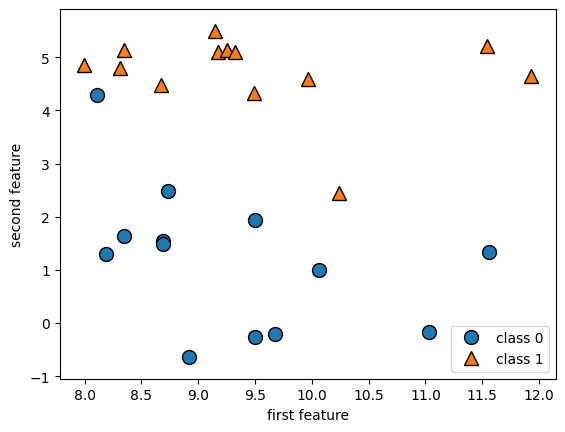

In [172]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape:", X.shape)


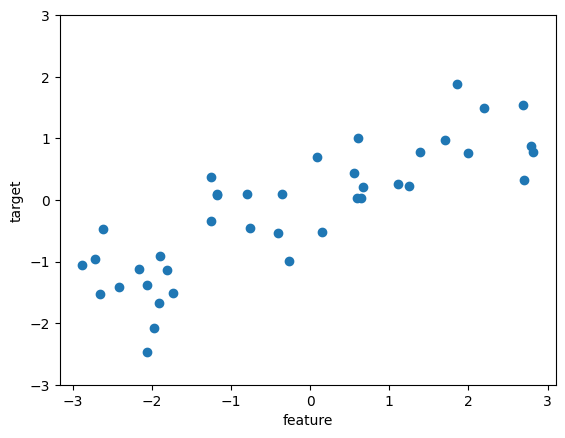

In [173]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')  # 수정: x와 y를 올바르게 사용
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

plt.show()  # 그래프를 화면에 출력

In [174]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key():\n", cancer.keys())

cancer.key():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [175]:
print("유방암 데이터의 형태:",cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [176]:
print("클래스별 샘플의 개수:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플의 개수:
 {'malignant': 212, 'benign': 357}


In [177]:
print("특성 이름:\n",cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [178]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:" , boston.data.shape)

데이터의 형태: (506, 13)


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [179]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)

X.shape: (506, 104)


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


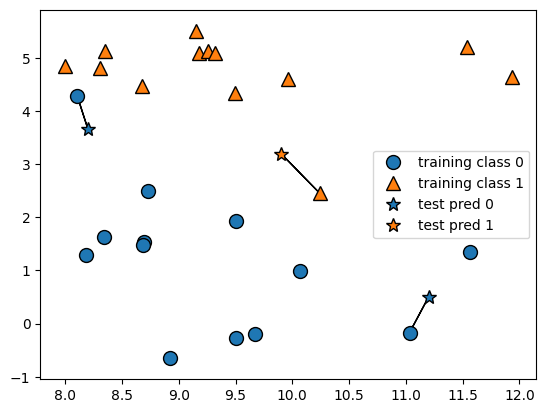

In [180]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


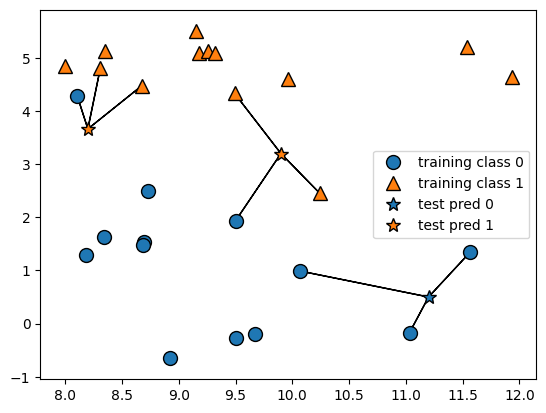

In [181]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


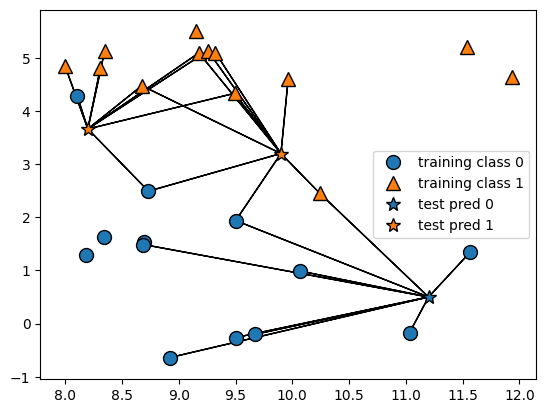

In [182]:
mglearn.plots.plot_knn_classification(n_neighbors=9)

In [348]:
from sklearn.model_selection import train_test_split
import mglearn
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=0)

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [349]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [350]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [351]:
print("테스트 세트 예측:",clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [352]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도: 0.86


이웃 수 1: 테스트 세트 정확도: 0.86
이웃 수 3: 테스트 세트 정확도: 0.86
이웃 수 9: 테스트 세트 정확도: 0.86


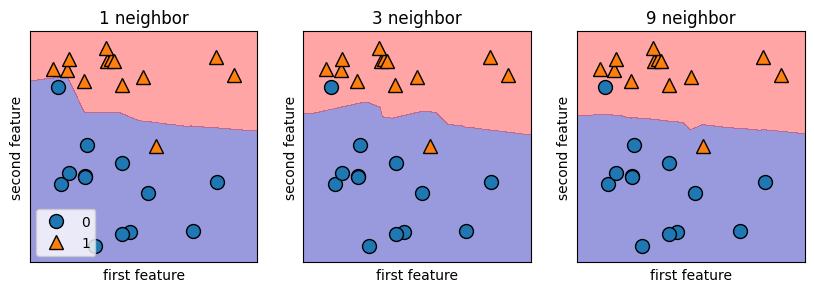

In [353]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("first feature")
    ax.set_ylabel("second feature")

# 정확도 계산 및 출력
accuracy_scores = []
for n_neighbors in [1, 3, 9]:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    print("이웃 수 {}: 테스트 세트 정확도: {:.2f}".format(n_neighbors, accuracy))

axes[0].legend(loc=3)


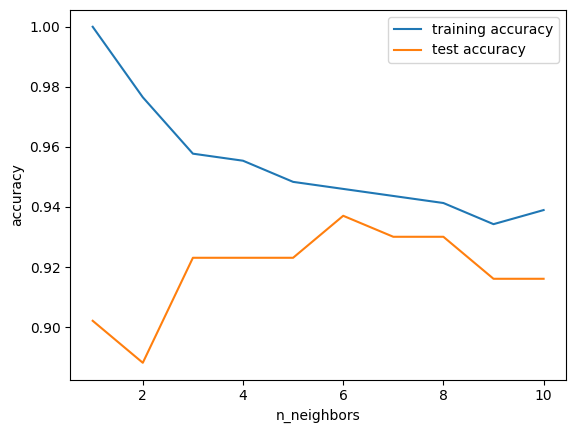

In [354]:
from sklearn.datasets import load_breast_cancer

canner = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

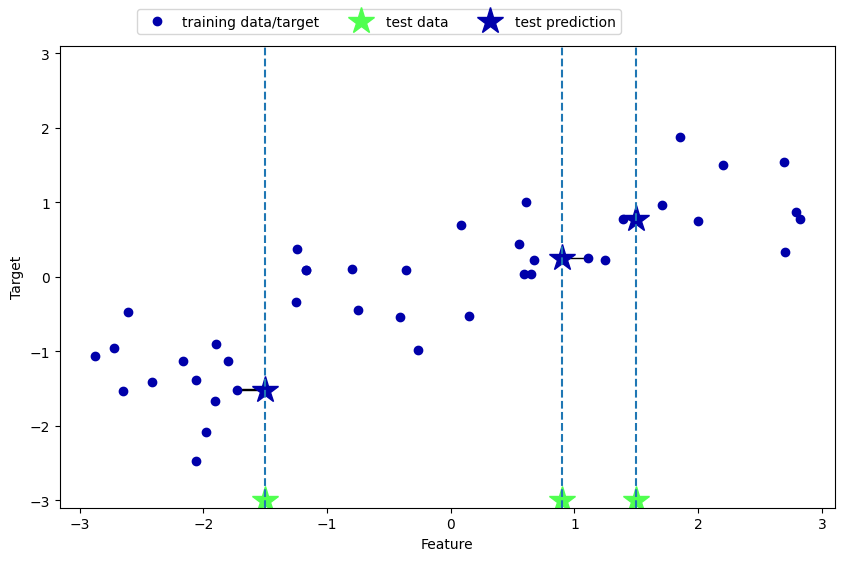

In [355]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

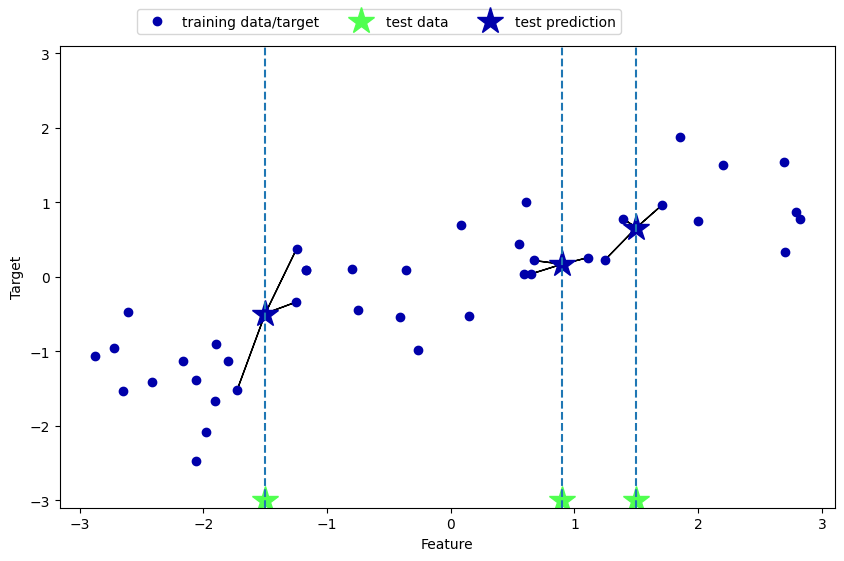

In [356]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [363]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [364]:
print("테스트 세트 예측:",reg.predict(X_test))

테스트 세트 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [365]:
print("테스트 세트 예측 R^2:{:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 예측 R^2:0.83


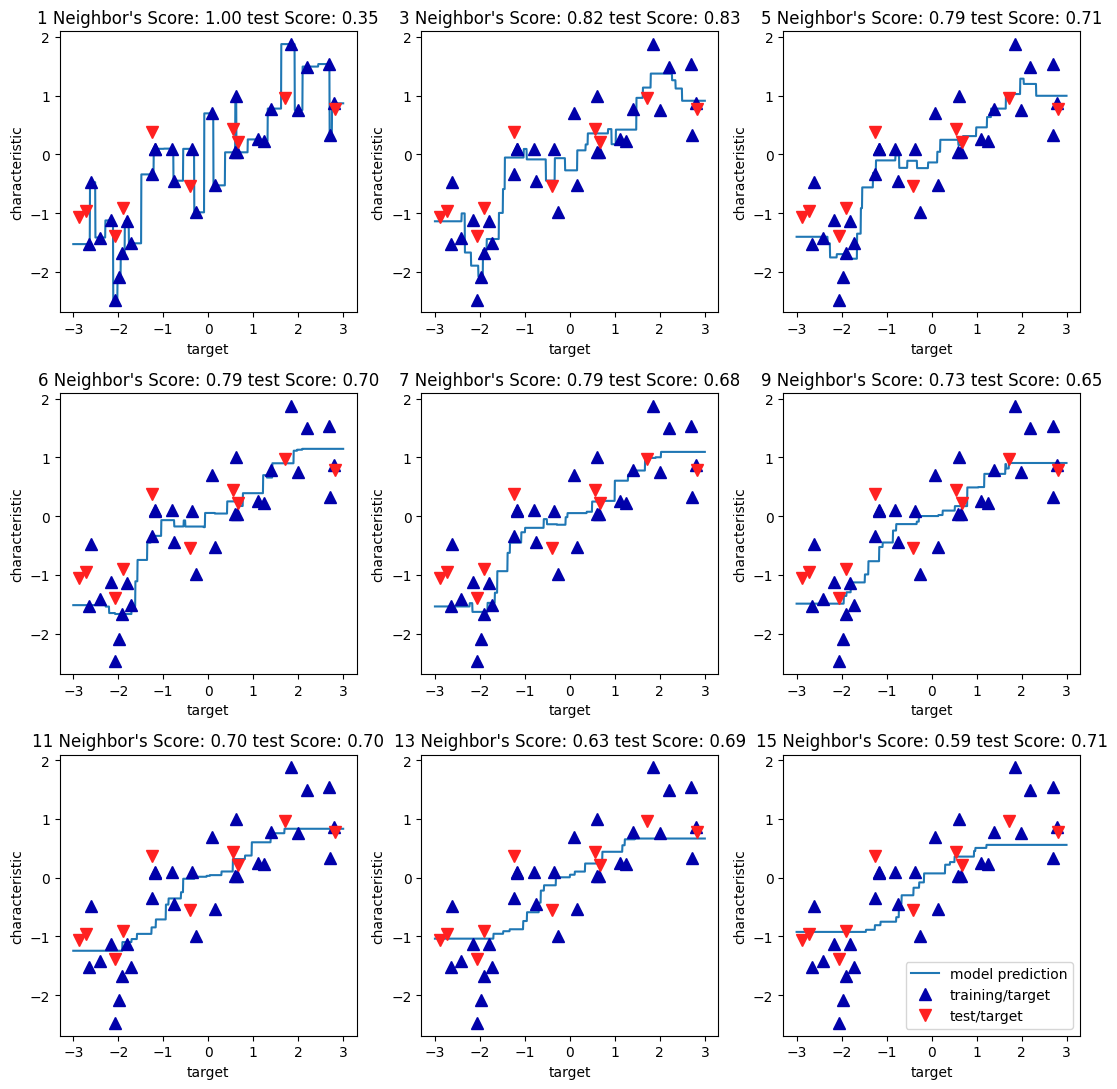

In [384]:
fig, axes = plt.subplots(3, 3, figsize=(11,11))  # Changed to 3 rows
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 5, 6, 7, 9,11,13,15], axes.ravel()):  # Added more n_neighbors values
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} Neighbor's Score: {:.2f} test Score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_ylabel("characteristic")
    ax.set_xlabel("target")

plt.legend(["model prediction", "training/target", "test/target"], loc="best")
plt.tight_layout()  # Added to improve subplot spacing
plt.show()